In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
#import warnings
#warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder



In [8]:
df1 = pd.read_excel('TelecomData\Customer_account_info.xlsx')

In [10]:
df1.head(5)

,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,CUST_ID001,42.0,Month-to-month,Yes,Electronic check,79.854582,1059.55
1,CUST_ID002,32.0,Month-to-month,Yes,Electronic check,76.845120,669.45
2,CUST_ID003,0.0,Month-to-month,No,Electronic check,55.614150,3791.6
3,CUST_ID004,72.0,Two year,Yes,Credit card (automatic),108.491169,6470.1
4,CUST_ID005,38.0,Month-to-month,Yes,Bank transfer (automatic),NaN,1496.9


In [15]:
df2 = pd.read_csv('TelecomData\Customer_Churn.csv')

In [12]:
df3 = pd.read_excel("TelecomData\Customer_demographics.xlsx")

In [13]:
df4 = pd.read_excel('TelecomData\Customer_services.xlsx')

In [16]:
df2.head(5)

,customerID,Churn
0,CUST_ID001,Yes
1,CUST_ID002,No
2,CUST_ID003,No
3,CUST_ID004,No
4,CUST_ID005,No


In [17]:
df3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,CUST_ID001,Male,0.0,Yes,No
1,CUST_ID002,Female,0.0,Yes,Yes
2,CUST_ID003,Female,0.0,No,No
3,CUST_ID004,Female,1.0,No,No
4,CUST_ID005,Male,1.0,No,No


In [18]:
df4.head()

,customerID,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,CUST_ID001,Yes,No phone service,Fiber optic,No,No,No,No,No,No
1,CUST_ID002,Yes,No,Fiber optic,No internet service,Yes,Yes,Yes,No internet service,Yes
2,CUST_ID003,Yes,No,DSL,Yes,Yes,No,No,No,Yes
3,CUST_ID004,Yes,Yes,Fiber optic,No,Yes,No internet service,Yes,Yes,Yes
4,CUST_ID005,Yes,Yes,Fiber optic,No,No,No,No,No,No


In [26]:
df4.columns

Index(['customerID', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [27]:
print("=== DATAFRAME SIZES ===")
print(f"df1 size: {df1.shape}")
print(f"df2 size: {df2.shape}")
print(f"df3 size: {df3.shape}")
print(f"df4 size: {df4.shape}")

=== DATAFRAME SIZES ===
df1 size: (34413, 7)
df2 size: (34413, 2)
df3 size: (34413, 5)
df4 size: (34413, 10)


In [34]:
def analyze_datatypes(df, name):
    print(f"{name}:")
    print(f"  Shape: {df.shape}")
    print(f"  Total Memory: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")
    print("  Column Details:")
    
    for col in df.columns:
        dtype = df[col].dtype
        memory = df[col].memory_usage(deep=True) / 1024
        nunique = df[col].nunique()
        print(f"    {col:15} | {str(dtype):10} | {memory:6.2f} KB | {nunique:4} unique")
    print()

# Analyze all dataframes
analyze_datatypes(df1, "DF1")
analyze_datatypes(df2, "DF2")
analyze_datatypes(df3, "DF3")
analyze_datatypes(df4, "DF4")

DF1:
  Shape: (34413, 7)
  Total Memory: 9678.83 KB
  Column Details:
    customerID      | object     | 2039.38 KB | 34413 unique
    tenure          | float64    | 268.98 KB |   73 unique
    Contract        | object     | 2030.91 KB |    3 unique
    PaperlessBilling | object     | 1734.91 KB |    2 unique
    PaymentMethod   | object     | 2255.06 KB |    4 unique
    MonthlyCharges  | float64    | 268.98 KB | 31031 unique
    TotalCharges    | object     | 1081.37 KB | 6368 unique

DF2:
  Shape: (34413, 2)
  Total Memory: 3758.97 KB
  Column Details:
    customerID      | object     | 2039.38 KB | 34413 unique
    Churn           | object     | 1719.71 KB |    2 unique

DF3:
  Shape: (34413, 5)
  Total Memory: 7573.54 KB
  Column Details:
    customerID      | object     | 2039.38 KB | 34413 unique
    gender          | object     | 1814.21 KB |    2 unique
    SeniorCitizen   | float64    | 268.98 KB |    2 unique
    Partner         | object     | 1730.18 KB |    2 unique
    De

In [39]:
#Check for duplicates, targetting CustomerID

def check_duplicates_comprehensive(df1, df2, df3, df4):
    """Comprehensive duplicate analysis for all dataframes"""
    
    print("=== COMPREHENSIVE DUPLICATE ANALYSIS ===\n")
    
    dataframes = [
        ("DF1", df1),
        ("DF2", df2), 
        ("DF3", df3),
        ("DF4", df4)
    ]
    
    for name, df in dataframes:
        print(f"{name} ({len(df)} rows):")
        
        # Check full row duplicates
        full_duplicates = df.duplicated().sum()
        print(f"  Full row duplicates: {full_duplicates}")
        
        # Check customerID duplicates (key column)
        if 'customerID' in df.columns:
            id_duplicates = df['customerID'].duplicated().sum()
            unique_customers = df['customerID'].nunique()
            print(f"  CustomerID duplicates: {id_duplicates}")
            print(f"  Unique customers: {unique_customers}")
            
            if id_duplicates > 0:
                print(f"  ⚠️  Same customer appears multiple times!")
                # Show examples
                duplicate_ids = df[df['customerID'].duplicated(keep=False)]['customerID'].unique()[:5]
                print(f"  Example duplicate IDs: {list(duplicate_ids)}")
     

check_duplicates_comprehensive(df1, df2, df3, df4)

=== COMPREHENSIVE DUPLICATE ANALYSIS ===

DF1 (34413 rows):
  Full row duplicates: 0
  CustomerID duplicates: 0
  Unique customers: 34413
DF2 (34413 rows):
  Full row duplicates: 0
  CustomerID duplicates: 0
  Unique customers: 34413
DF3 (34413 rows):
  Full row duplicates: 0
  CustomerID duplicates: 0
  Unique customers: 34413
DF4 (34413 rows):
  Full row duplicates: 0
  CustomerID duplicates: 0
  Unique customers: 34413


In [64]:
df_all = df1.merge(df2, on='customerID', how='outer') \
            .merge(df3, on='customerID', how='outer') \
            .merge(df4, on='customerID', how='outer')

In [65]:
df_all.head()

,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,CUST_ID001,42.0,Month-to-month,Yes,Electronic check,79.854582,1059.55,Yes,Male,0.0,Yes,No,Yes,No phone service,Fiber optic,No,No,No,No,No,No
1,CUST_ID002,32.0,Month-to-month,Yes,Electronic check,76.845120,669.45,No,Female,0.0,Yes,Yes,Yes,No,Fiber optic,No internet service,Yes,Yes,Yes,No internet service,Yes
2,CUST_ID003,0.0,Month-to-month,No,Electronic check,55.614150,3791.6,No,Female,0.0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,Yes
3,CUST_ID004,72.0,Two year,Yes,Credit card (automatic),108.491169,6470.1,No,Female,1.0,No,No,Yes,Yes,Fiber optic,No,Yes,No internet service,Yes,Yes,Yes
4,CUST_ID005,38.0,Month-to-month,Yes,Bank transfer (automatic),NaN,1496.9,No,Male,1.0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No


In [66]:
df_all.columns

Index(['customerID', 'tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'gender', 'SeniorCitizen',
       'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [67]:
df_all.isnull().sum()

customerID           0
tenure              16
Contract             7
PaperlessBilling    33
PaymentMethod       49
MonthlyCharges      13
TotalCharges        10
Churn                0
gender               5
SeniorCitizen       42
Partner              0
Dependents           0
PhoneService        12
MultipleLines        0
InternetService      0
OnlineSecurity      37
OnlineBackup         0
DeviceProtection     0
TechSupport         35
StreamingTV          0
StreamingMovies      0
dtype: int64

In [68]:
print("DF1 Optimizations:")

df_all['TotalCharges'] = pd.to_numeric(df_all['TotalCharges'], errors='coerce').astype('float32')



DF1 Optimizations:


In [69]:
#replacing nan by mean values for the columns below

df_all['TotalCharges'] = df_all['tenure'].fillna(df_all['TotalCharges'].mean())

df_all['tenure'] = df_all['tenure'].fillna(df_all['tenure'].mean())
df_all['MonthlyCharges'] = df_all['MonthlyCharges'].fillna(df_all['MonthlyCharges'].mean())

In [70]:
#deleting nan values for the columns below

columns_to_drop = ['PaperlessBilling', 'PaymentMethod', 'gender', 'SeniorCitizen', 
                   'PhoneService', 'OnlineSecurity', 'TechSupport', "Contract"]

df_all = df_all.dropna(subset=columns_to_drop)



In [71]:
df_all.shape

(34209, 21)

In [62]:
df_all.isnull().sum()

customerID          0
tenure              0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [72]:
#Saving space by converting datatype

print("DF1 Optimizations:")
df_all['tenure'] = df_all['tenure'].astype('int8')  
df_all['MonthlyCharges'] = df_all['MonthlyCharges'].astype('float32')


print("DF3 Optimizations:")
df_all['SeniorCitizen'] = df_all['SeniorCitizen'].astype('int8') 


DF1 Optimizations:
DF3 Optimizations:


In [98]:
df_all.head()

,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,CUST_ID001,42,Month-to-month,Yes,Electronic check,79.854584,42.0,Yes,Male,0,Yes,No,Yes,No phone service,Fiber optic,No,No,No,No,No,No
1,CUST_ID002,32,Month-to-month,Yes,Electronic check,76.845123,32.0,No,Female,0,Yes,Yes,Yes,No,Fiber optic,No internet service,Yes,Yes,Yes,No internet service,Yes
2,CUST_ID003,0,Month-to-month,No,Electronic check,55.614151,0.0,No,Female,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,Yes
3,CUST_ID004,72,Two year,Yes,Credit card (automatic),108.491165,72.0,No,Female,1,No,No,Yes,Yes,Fiber optic,No,Yes,No internet service,Yes,Yes,Yes
4,CUST_ID005,38,Month-to-month,Yes,Bank transfer (automatic),65.049759,38.0,No,Male,1,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No


CLEANED_JOINED_DATASET

In [99]:
df_all.columns

Index(['customerID', 'tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'gender', 'SeniorCitizen',
       'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [106]:
df_demo = df_all[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Churn']]

In [107]:
df_demo.head()

,gender,SeniorCitizen,Partner,Dependents,Churn
0,Male,0,Yes,No,Yes
1,Female,0,Yes,Yes,No
2,Female,0,No,No,No
3,Female,1,No,No,No
4,Male,1,No,No,No


In [108]:


# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

# Create readable labels for SeniorCitizen
df_demo['SeniorCitizen_Label'] = df_demo['SeniorCitizen'].map({0: 'Not Senior', 1: 'Senior'})

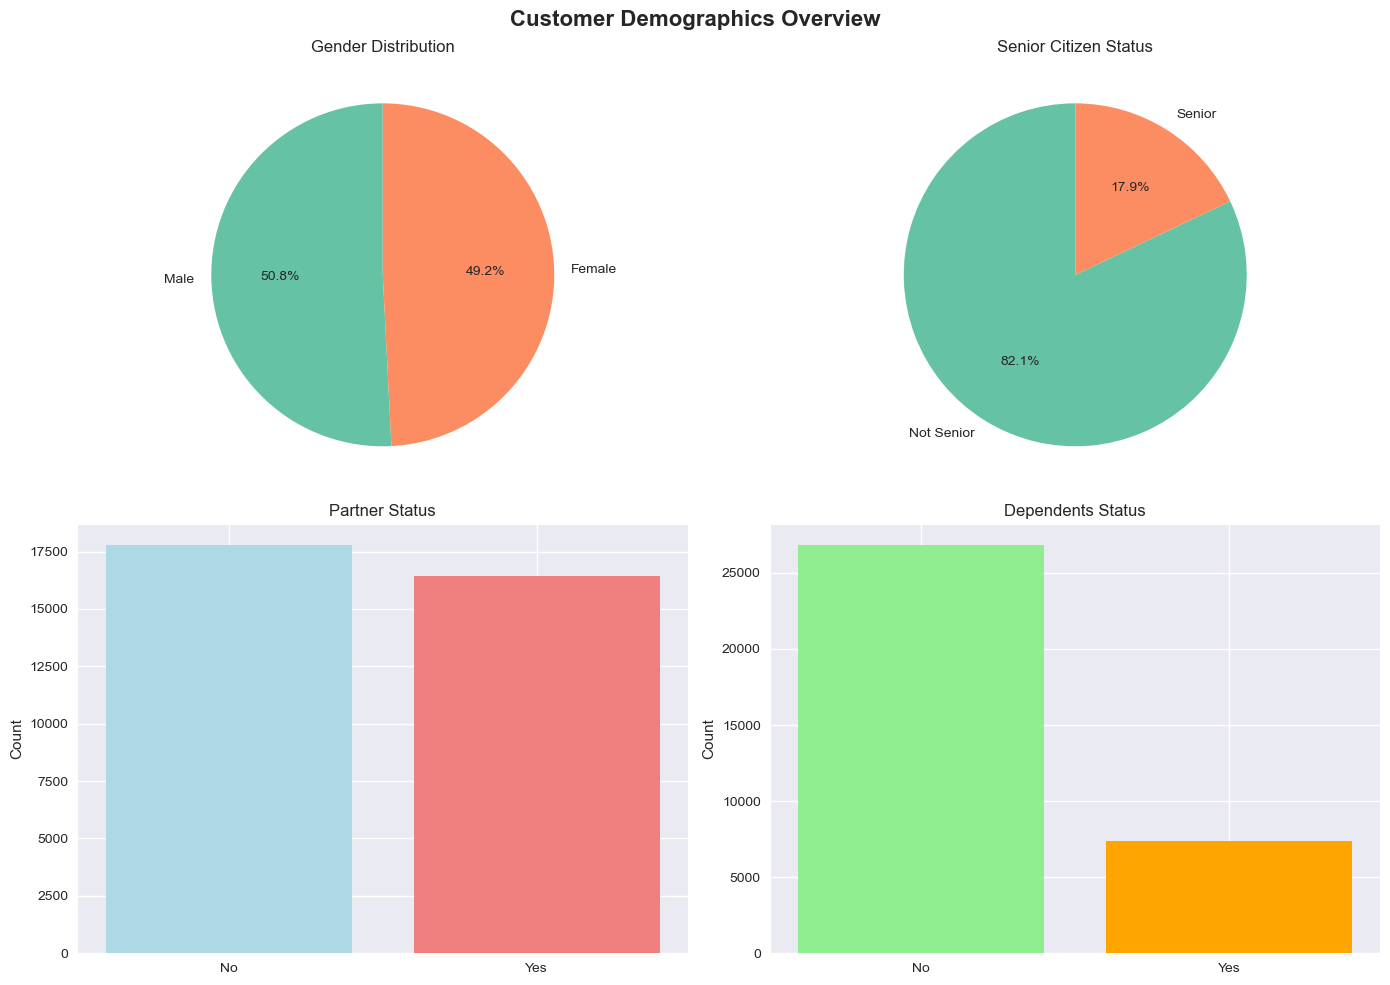

In [109]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Customer Demographics Overview', fontsize=16, fontweight='bold')

# Gender distribution
gender_counts = df_demo['gender'].value_counts()
axes[0,0].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Gender Distribution')

# Senior Citizen distribution
senior_counts = df_demo['SeniorCitizen_Label'].value_counts()
axes[0,1].pie(senior_counts.values, labels=senior_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,1].set_title('Senior Citizen Status')

# Partner status
partner_counts = df_demo['Partner'].value_counts()
axes[1,0].bar(partner_counts.index, partner_counts.values, color=['lightblue', 'lightcoral'])
axes[1,0].set_title('Partner Status')
axes[1,0].set_ylabel('Count')

# Dependents status
dep_counts = df_demo['Dependents'].value_counts()
axes[1,1].bar(dep_counts.index, dep_counts.values, color=['lightgreen', 'orange'])
axes[1,1].set_title('Dependents Status')
axes[1,1].set_ylabel('Count')

plt.tight_layout()
plt.show()

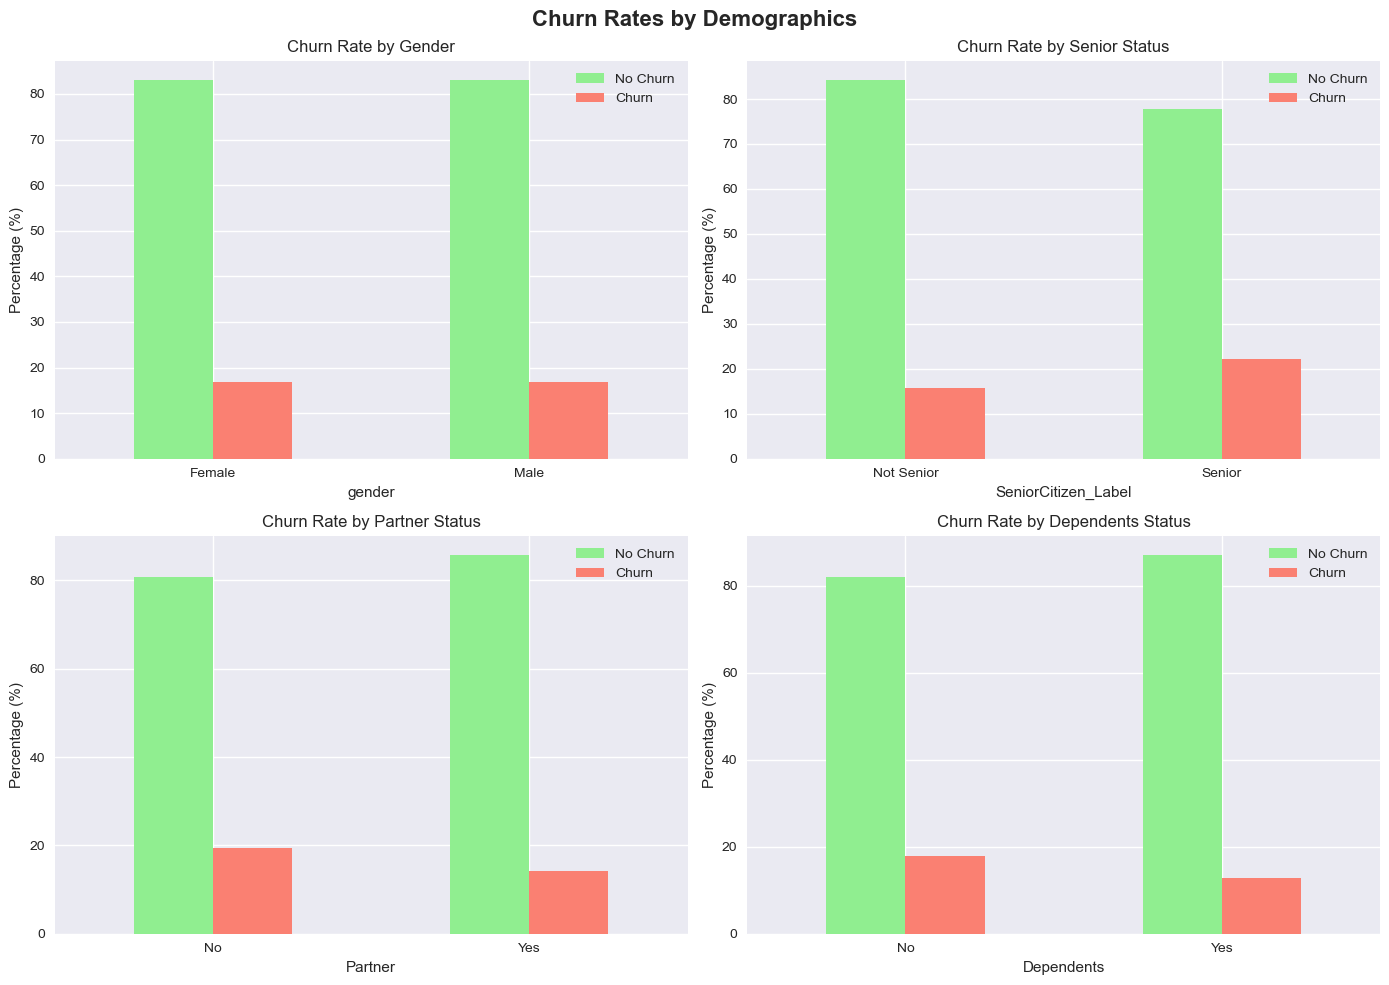

In [110]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Churn Rates by Demographics', fontsize=16, fontweight='bold')

# Gender vs Churn
gender_churn = pd.crosstab(df_demo['gender'], df_demo['Churn'], normalize='index') * 100
gender_churn.plot(kind='bar', ax=axes[0,0], color=['lightgreen', 'salmon'])
axes[0,0].set_title('Churn Rate by Gender')
axes[0,0].set_ylabel('Percentage (%)')
axes[0,0].legend(['No Churn', 'Churn'])
axes[0,0].tick_params(axis='x', rotation=0)

# Senior Citizen vs Churn
senior_churn = pd.crosstab(df_demo['SeniorCitizen_Label'], df_demo['Churn'], normalize='index') * 100
senior_churn.plot(kind='bar', ax=axes[0,1], color=['lightgreen', 'salmon'])
axes[0,1].set_title('Churn Rate by Senior Status')
axes[0,1].set_ylabel('Percentage (%)')
axes[0,1].legend(['No Churn', 'Churn'])
axes[0,1].tick_params(axis='x', rotation=0)

# Partner vs Churn
partner_churn = pd.crosstab(df_demo['Partner'], df_demo['Churn'], normalize='index') * 100
partner_churn.plot(kind='bar', ax=axes[1,0], color=['lightgreen', 'salmon'])
axes[1,0].set_title('Churn Rate by Partner Status')
axes[1,0].set_ylabel('Percentage (%)')
axes[1,0].legend(['No Churn', 'Churn'])
axes[1,0].tick_params(axis='x', rotation=0)

# Dependents vs Churn
dep_churn = pd.crosstab(df_demo['Dependents'], df_demo['Churn'], normalize='index') * 100
dep_churn.plot(kind='bar', ax=axes[1,1], color=['lightgreen', 'salmon'])
axes[1,1].set_title('Churn Rate by Dependents Status')
axes[1,1].set_ylabel('Percentage (%)')
axes[1,1].legend(['No Churn', 'Churn'])
axes[1,1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [73]:
df_all.head()

,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,CUST_ID001,42,Month-to-month,Yes,Electronic check,79.854584,42.0,Yes,Male,0,Yes,No,Yes,No phone service,Fiber optic,No,No,No,No,No,No
1,CUST_ID002,32,Month-to-month,Yes,Electronic check,76.845123,32.0,No,Female,0,Yes,Yes,Yes,No,Fiber optic,No internet service,Yes,Yes,Yes,No internet service,Yes
2,CUST_ID003,0,Month-to-month,No,Electronic check,55.614151,0.0,No,Female,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,Yes
3,CUST_ID004,72,Two year,Yes,Credit card (automatic),108.491165,72.0,No,Female,1,No,No,Yes,Yes,Fiber optic,No,Yes,No internet service,Yes,Yes,Yes
4,CUST_ID005,38,Month-to-month,Yes,Bank transfer (automatic),65.049759,38.0,No,Male,1,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No


Q2 if dataset is balanced?

Churn
No     28448
Yes     5761
Name: count, dtype: int64


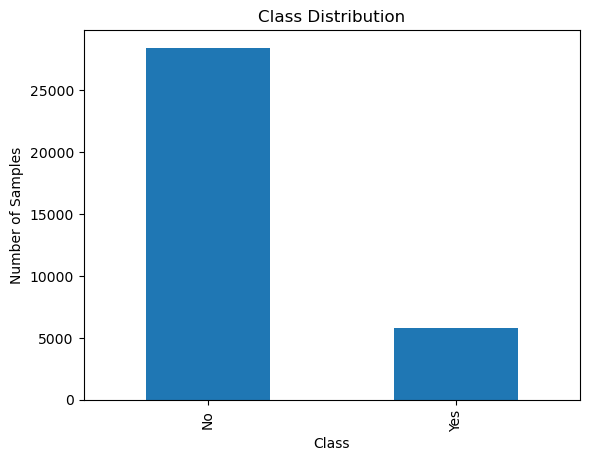

In [75]:
class_counts = df_all['Churn'].value_counts()
print(class_counts)

# Visualize
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.show()

Answer 2: - The dependent variable "Churn" column has two distinct values "yes" and "no". The dataset is imbalanced
as ratio of NO:YES is in "Churn" column is 
approximately 5:1

-----------------

Q1 	Is there any relation between contract duration, charges and the customer churn?

Q3	Identify the relationship between the services offered and the churn rate.

ANS - The questions asks about relations between dependent and independent variables, if it has asked for relation between independent variables only, we could have used correlation

dependent variable =  Churn  (categorical)
independent variables (numerical)  = MonthlyCharges,	TotalCharges  (numerical)
independent variables (categorical)  = Contract,	'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies'  (categorical)

For Numerical Independent vs. Categorical Dependent
Statistical test: T-test or ANOVA

For Categorical Independent vs. Categorical Dependent
Statistical test: Chi-square test


There is a statistically significant difference in both MonthlyCharges and TotalCharges between customers who churned and those who did not (p < 0.001 for both). Churned customers tend to have higher MonthlyCharges and lower TotalCharges compared to non-churned customers. This suggests that higher monthly costs and shorter customer lifespans are associated with increased churn.

Customers who churn tend to have higher monthly charges but lower total charges (possibly because they stay for a shorter period).

Most service and plan features—including Contract type, InternetService, TechSupport, OnlineSecurity, OnlineBackup, DeviceProtection, StreamingTV, StreamingMovies, and PhoneService—show a statistically significant association with customer churn. The Contract variable has the strongest relationship with churn. Only MultipleLines does not show a significant association. This suggests that most service features are linked to whether a customer churns, with Contract type being the most influential factor.





In [86]:
df_t = df_all[['MonthlyCharges', 'TotalCharges', 'Churn']]

df_chi = df_all[['Contract', 'PhoneService', 'MultipleLines', 'InternetService',
                 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                 'StreamingTV', 'StreamingMovies', 'Churn']]

In [87]:
le = LabelEncoder()
df_t['Churn'] = le.fit_transform(df_anova['Churn'])

In [88]:
df_t.head()

,MonthlyCharges,TotalCharges,Churn
0,79.854584,42.0,1
1,76.845123,32.0,0
2,55.614151,0.0,0
3,108.491165,72.0,0
4,65.049759,38.0,0


In [89]:
df_t.columns

Index(['MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

In [92]:
#T TEST

from scipy.stats import ttest_ind

no_churn = df_t[df_t['Churn'] == 0]
churn = df_t[df_t['Churn'] == 1]

print("\n=== T-TESTS ===")

# t-test for MonthlyCharges
t_stat_monthly, p_val_monthly = ttest_ind(no_churn['MonthlyCharges'], churn['MonthlyCharges'])
print(f"MonthlyCharges: t={t_stat_monthly:.4f}, p={p_val_monthly:.4f}")

# t-test for TotalCharges  
t_stat_total, p_val_total = ttest_ind(no_churn['TotalCharges'], churn['TotalCharges'])
print(f"TotalCharges: t={t_stat_total:.4f}, p={p_val_total:.4f}")



=== T-TESTS ===
MonthlyCharges: t=-23.3809, p=0.0000
TotalCharges: t=13.5840, p=0.0000


There is a statistically significant difference in both MonthlyCharges and TotalCharges between customers who churned and those who did not (p < 0.001 for both). Churned customers tend to have higher MonthlyCharges and lower TotalCharges compared to non-churned customers. This suggests that higher monthly costs and shorter customer lifespans are associated with increased churn.

Customers who churn tend to have higher monthly charges but lower total charges (possibly because they stay for a shorter period).


In [93]:
df_chi.columns

Index(['Contract', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Churn'],
      dtype='object')

In [97]:
#CHI SQUARE TEST

In [94]:
for column in df_chi.columns:
    df_chi[column] = le.fit_transform(df_chi[column])
df_chi.head()

,Contract,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,0,1,1,1,0,0,0,0,0,0,1
1,0,1,0,1,1,2,2,2,1,2,0
2,0,1,0,0,2,2,0,0,0,2,0
3,2,1,2,1,0,2,1,2,2,2,0
4,0,1,2,1,0,0,0,0,0,0,0


In [96]:
from scipy.stats import chi2_contingency
import pandas as pd

independent_vars = ['Contract', 'PhoneService', 'MultipleLines', 'InternetService',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                   'StreamingTV', 'StreamingMovies']

print("=== CHI-SQUARE TESTS ===")
results = []

for var in independent_vars:
    # Create contingency table
    contingency_table = pd.crosstab(df_chi[var], df_chi['Churn'])
    
    # Perform chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Store results
    results.append({
        'Variable': var,
        'Chi2': chi2,
        'P-value': p_value,
        'DOF': dof,
        'Significant': 'Yes' if p_value < 0.05 else 'No'
    })
    
    print(f"{var}:")
    print(f"  Chi2: {chi2:.4f}, P-value: {p_value:.4f}, Significant: {'Yes' if p_value < 0.05 else 'No'}")

# Summary DataFrame
results_df = pd.DataFrame(results)
print(f"\n=== SUMMARY ===")
print(results_df)

=== CHI-SQUARE TESTS ===
Contract:
  Chi2: 1128.6492, P-value: 0.0000, Significant: Yes
PhoneService:
  Chi2: 6.2485, P-value: 0.0124, Significant: Yes
MultipleLines:
  Chi2: 1.4254, P-value: 0.4903, Significant: No
InternetService:
  Chi2: 945.6259, P-value: 0.0000, Significant: Yes
OnlineSecurity:
  Chi2: 920.7486, P-value: 0.0000, Significant: Yes
OnlineBackup:
  Chi2: 712.8407, P-value: 0.0000, Significant: Yes
DeviceProtection:
  Chi2: 691.1695, P-value: 0.0000, Significant: Yes
TechSupport:
  Chi2: 961.3369, P-value: 0.0000, Significant: Yes
StreamingTV:
  Chi2: 326.5961, P-value: 0.0000, Significant: Yes
StreamingMovies:
  Chi2: 358.3668, P-value: 0.0000, Significant: Yes

=== SUMMARY ===
           Variable         Chi2        P-value  DOF Significant
0          Contract  1128.649226  8.259135e-246    2         Yes
1      PhoneService     6.248489   1.242993e-02    1         Yes
2     MultipleLines     1.425448   4.903068e-01    2          No
3   InternetService   945.625937  4

Most service and plan features—including Contract type, InternetService, TechSupport, OnlineSecurity, OnlineBackup, DeviceProtection, StreamingTV, StreamingMovies, and PhoneService—show a statistically significant association with customer churn. The Contract variable has the strongest relationship with churn. Only MultipleLines does not show a significant association. This suggests that most service features are linked to whether a customer churns, with Contract type being the most influential factor.
